# Keras iris Modeling

In [2]:
import warnings
warnings.filterwarnings('ignore')

> ## 1) 실습용 데이터 설정

- iris.csv

In [3]:
import seaborn as sns

iris = sns.load_dataset('iris')

- pandas DataFrame

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


> ## 2) Version check

- TensorFlow Version

In [6]:
import tensorflow

tensorflow.__version__

'2.11.0'

- Keras Version

In [7]:
import keras

keras.__version__

'2.11.0'

# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

- Species : setosa, versicolor, virginica

In [8]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> ## 2) 분석 변수 선택

- X: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
- y: 'species'

In [10]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

X.shape, y.shape

((150, 4), (150,))

> ## 3) One Hot Encoding with sklearn & Keras

- LabelEncoder( )
   - ['setosa', 'versicolor', 'virginica'] to [0, 1, 2]

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
LBE_y = encoder.fit_transform(y)

LBE_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- One-Hot Encoding - to_categorical( )

In [13]:
from tensorflow.keras.utils import to_categorical

OHE_y = to_categorical(LBE_y)

OHE_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 4) train_test_split( )

- 7 : 3

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,OHE_y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# II. Keras Modeling

> ## 1) Keras models & layers import

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

> ## 2) Model Define

- 모델 신경망 구조 정의

In [16]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

- 모델 구조 확인

   - Layers & Parameters

In [17]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


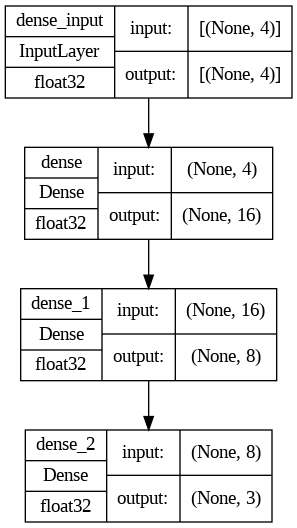

In [18]:
from tensorflow.keras import utils

utils.plot_model(Model_iris,
                 show_shapes = True,
                 show_dtype = True)

> ## 3) Model Compile

- 모델 학습방법 설정

In [19]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

> ## 4) Model Fit

- 모델 학습 수행

In [20]:
History_iris = Model_iris.fit(X_train, y_train,
                              epochs = 1000,
                              batch_size = 7,
                              validation_data = (X_test, y_test))

Epoch 1/1000
15/15 [==============================] - 2s 22ms/step - loss: 1.5853 - accuracy: 0.3143 - val_loss: 1.2146 - val_accuracy: 0.2667
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.1194 - accuracy: 0.2952 - val_loss: 1.0477 - val_accuracy: 0.3556
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.9918 - accuracy: 0.3524 - val_loss: 0.9959 - val_accuracy: 0.3333
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9245 - accuracy: 0.3429 - val_loss: 0.9266 - val_accuracy: 0.3778
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.8696 - accuracy: 0.5905 - val_loss: 0.8586 - val_accuracy: 0.7111
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8182 - accuracy: 0.8381 - val_loss: 0.8127 - val_accuracy: 0.7111
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7950 - accuracy: 0.6667 - val_loss: 0.7724 - val_accuracy: 0.7111
Epoch

> ## 5) 학습 결과 시각화

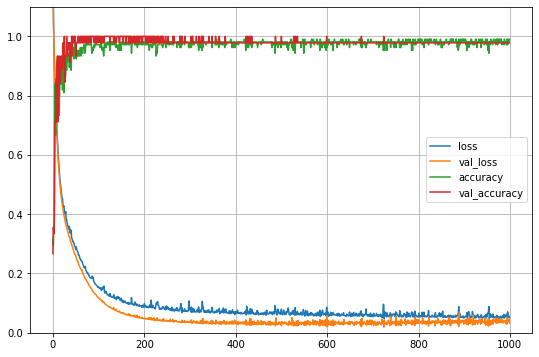

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.ylim(0, 1.1)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

- Loss & Accuracy

In [23]:
loss, accuracy = Model_iris.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.03303
Accuracy = 0.97778


> ## 7) Model Predict

- Probability

In [24]:
import numpy as np

np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(X_test, verbose = 0)

array([[0.99999, 0.00001, 0.     ],
       [0.99857, 0.00142, 0.00002],
       [0.00023, 0.99977, 0.00001],
       [0.     , 0.     , 1.     ],
       [1.     , 0.     , 0.     ],
       [0.00001, 0.99997, 0.00002],
       [0.     , 0.00172, 0.99828],
       [1.     , 0.     , 0.     ],
       [0.     , 0.00007, 0.99993],
       [0.99999, 0.     , 0.     ],
       [0.     , 0.96395, 0.03605],
       [0.     , 0.00034, 0.99966],
       [0.     , 0.99935, 0.00065],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.99922, 0.00078],
       [0.     , 0.99547, 0.00453],
       [0.99999, 0.     , 0.00001],
       [0.     , 0.99989, 0.00011],
       [1.     , 0.     , 0.     ],
       [0.99999, 0.     , 0.     ],
       [0.99999, 0.     , 0.00001],
       [0.     , 0.00009, 0.99991],
       [1.     , 0.     , 0.     ],
       [0.     , 0.01375, 0.98625],
       [0.     , 0.01155, 0.98845],
       [1.     , 0.     , 0.     ],
       [0.     , 0.99884, 0.

- Probability to Class

In [25]:
y_hat = np.argmax(Model_iris.predict(X_test, verbose = 0), axis = 1)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- One-Hot Encoding to Array
  - np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
  - axis = 1 : 열기준

In [26]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [28]:
print(classification_report(y, y_hat,
                            target_names = ['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# III. Model Save & Load

> ## 1) File System

- Save to Colab File System

In [29]:
!ls -l

total 32
-rw-r--r-- 1 root root 27127 Mar 28 06:30 model.png
drwxr-xr-x 1 root root  4096 Mar 24 13:39 sample_data


In [30]:
Model_iris.save('Model_iris.h5')

!ls -l

total 68
-rw-r--r-- 1 root root 34240 Mar 28 06:38 Model_iris.h5
-rw-r--r-- 1 root root 27127 Mar 28 06:30 model.png
drwxr-xr-x 1 root root  4096 Mar 24 13:39 sample_data


- Download Colab File System to Local File System

In [31]:
from google.colab import files

files.download('Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Load from Colab File System

In [32]:
from tensorflow.keras.models import load_model

Model_local = load_model('Model_iris.h5')

In [33]:
np.argmax(Model_local.predict(X_test, verbose = 0), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

> ## 2) Google Drive

- Mount Google Drive

In [34]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- Make 'models' Directory

In [35]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

- Check Mounted_Drive

In [36]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 0


- Save to Mounted Google Drive Directory

In [37]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [38]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34240 Mar 28 06:42 001_Model_iris.h5


- Load from Mounted Google Drive Directory

In [39]:
from tensorflow.keras.models import load_model

Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [40]:
np.argmax(Model_google.predict(X_test, verbose = 0), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])